## Программа для обновления данных в справочниках dict_gtprge_gen и dict_registry_gen

In [1]:
import pandas as pd
import requests
from sqlalchemy import create_engine
from datetime import date
from day_ahead_scripts import config
import warnings
import traceback
from xlsxwriter import workbook
from openpyxl import load_workbook
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Загружаем наиболее актуальные данные из РИО

In [2]:
rio_data = pd.read_excel('data/RIO_2018_05.xlsx')

In [21]:
rio_data.head()

,TRADER_CODE,COMPANY_NAME,ZSP,STATION_NAME,STATION_CODE,GTP_CODE,GTP_NAME,PRICE_ZONE_CODE,OES,RGE_CODE,RGE_NAME,PUST_RGE,IS_SPOT_TRADER,PUST_GTP,REGION_CODE,REGION_NAME
0,ABAKANKS,"ООО ""Абаканская СЭС""",1.0,"Солнечная электростанция ""Абаканская""",SVIE0034,GVIE0034,"Солнечная электростанция ""Абаканская""",2,10,10937,"Солнечная электростанция ""Абаканская""",5.198,1,5.198,95,Республика Хакасия
1,ALTAENSB,"АО ""Алтайэнергосбыт""",6.0,"МУП ""Рубцовский тепловой комплекс""",BALTENE4,GALTENE4,"МУП ""Рубцовский тепловой комплекс""",2,10,10100,"МУП ""Рубцовский тепловой комплекс""",18.000,0,18.000,1,Алтайский край
2,ALTAENSB,"АО ""Алтайэнергосбыт""",6.0,"ОАО ""Кучуксульфат""",BALTENE5,GALTENE5,"ОАО ""Кучуксульфат""",2,10,10701,"ОАО ""Кучуксульфат""",18.000,0,18.000,1,Алтайский край
3,ALTAENSB,"АО ""Алтайэнергосбыт""",6.0,"МУП ""Яровской теплоэлектрокомплекс""",BALTENE6,GALTENE6,"МУП ""Яровской теплоэлектрокомплекс""",2,10,10702,"МУП ""Яровской теплоэлектрокомплекс""",24.000,0,24.000,1,Алтайский край
4,ALTAENSB,"АО ""Алтайэнергосбыт""",6.0,"ЗАО ""Инновация"" (Газопоршневая электрогенераци...",BALTENE7,GALTENE7,"ЗАО ""Инновация"" (Газопоршневая электрогенераци...",2,10,10703,"ЗАО ""Инновация"" (Газопоршневая электрогенераци...",16.000,0,16.000,1,Алтайский край


### Загружаем наиболее актуальные данные из справочников Exergy 

In [3]:
dict_gtprge_gen = pd.read_excel('data/hdbk_326.xlsx', sheet_name='GTPRGE_GEN')
dict_registry_gen = pd.read_excel('data/hdbk_326.xlsx', sheet_name='REGISTRY_GEN')
dict_gtprge_gen.columns = [s.upper() for s in dict_gtprge_gen.columns]
dict_registry_gen.columns = [s.upper() for s in dict_registry_gen.columns]

In [16]:
comp = dict_gtprge_gen.merge(right=rio_data, left_on='RGE_NUM', right_on='RGE_CODE', how='left')
comp[comp['RGE_CODE'].notna()]
#dict_gtprge_gen.head()
#dict_registry_gen.head()

,STATION_CODE_x,STATION_NAME_x,GTP_CODE_x,GTP_NAME_x,RGE_NUM,RGE_NAME_x,DAY_AHEAD_TYPE,DATE_FROM,DATE_TO,AUTHOR,...,GTP_NAME_y,PRICE_ZONE_CODE,OES,RGE_CODE,RGE_NAME_y,PUST_RGE,IS_SPOT_TRADER,PUST_GTP,REGION_CODE,REGION_NAME
0,SSVERDL1,Рефтинская ГРЭС,GSVERDL1,Рефтинская ГРЭС-220 (ТГ 1-4),1001,"Рефтинская ГРЭС (220) (БЛ 1,2)",0,2016-01-01,NaT,i.zemskov@skmmp.onmicrosoft.com,...,Рефтинская ГРЭС-220 (ТГ 1-4),1.0,1.0,1001.0,"Рефтинская ГРЭС (220) (БЛ 1,2)",600.0,1.0,1200.0,65.0,Свердловская область
1,SSVERDL1,Рефтинская ГРЭС,GSVERDL2,Рефтинская ГРЭС-500 (ТГ 5-10),1002,Рефтинская ГРЭС (500) (БЛ 5),1,2018-04-01,NaT,i.zemskov@skmmp.onmicrosoft.com,...,Рефтинская ГРЭС-500 (ТГ 5-10),1.0,1.0,1002.0,Рефтинская ГРЭС (ТГ 5),300.0,1.0,2600.0,65.0,Свердловская область
2,SSVERDL5,Среднеуральская ГРЭС,GSVERDL5,"Среднеуральская ГРЭС ТГ-1, 2, 5, 6, 7, 8",1005,"Среднеуральская ГРЭС (110) (ТГ 6,7,8)",0,2016-01-01,NaT,i.zemskov@skmmp.onmicrosoft.com,...,"Среднеуральская ГРЭС ТГ- 6, 7, 8",1.0,1.0,1005.0,Среднеуральская ГРЭС (ТГ 6-8),238.0,1.0,238.0,65.0,Свердловская область
3,SSVERDL5,Среднеуральская ГРЭС,GSVERDL6,Среднеуральская ГРЭС-220,1006,Среднеуральская ГРЭС (220) (БЛ 9),0,2016-01-01,NaT,i.zemskov@skmmp.onmicrosoft.com,...,Среднеуральская ГРЭС-220,1.0,1.0,1006.0,Среднеуральская ГРЭС (ТГ 9),310.0,1.0,921.5,65.0,Свердловская область
4,FBELOAES,Белоярская АЭС,GFBELOAE,Белоярская АЭС,1007,Белоярская АЭС (БЛ3),0,2016-01-01,NaT,i.zemskov@skmmp.onmicrosoft.com,...,Белоярская АЭС,1.0,1.0,1007.0,Белоярская АЭС,600.0,1.0,600.0,65.0,Свердловская область
5,SSVERDL9,Богословская ТЭЦ,GSVERDL9,Богословская ТЭЦ,1010,Богословская ТЭЦ,2,2016-01-01,NaT,i.zemskov@skmmp.onmicrosoft.com,...,Богословская ТЭЦ,1.0,1.0,1010.0,Богословская ТЭЦ,135.5,0.0,135.5,65.0,Свердловская область
6,SSVERD12,Красногорская ТЭЦ,GSVERD12,Красногорская ТЭЦ (ТГ 5),1013,Красногорская ТЭЦ,0,2016-01-01,NaT,i.zemskov@skmmp.onmicrosoft.com,...,Красногорская ТЭЦ,1.0,1.0,1013.0,Красногорская ТЭЦ,121.0,1.0,121.0,65.0,Свердловская область
7,SSVERD13,Ново-Свердловская ТЭЦ,GSVERD13,Ново-Свердловская ТЭЦ 110,1014,Ново-Свердловская ТЭЦ (110) (ТГ 1-3),0,2016-01-01,NaT,i.zemskov@skmmp.onmicrosoft.com,...,Ново-Свердловская ТЭЦ 110,1.0,1.0,1014.0,Ново-Свердловская ТЭЦ 110,330.0,1.0,330.0,65.0,Свердловская область
8,SSVERD13,Ново-Свердловская ТЭЦ,GSVERD14,Ново-Свердловская ТЭЦ 220,1015,Ново-Свердловская ТЭЦ (220) (ТГ-5),0,2016-01-01,NaT,i.zemskov@skmmp.onmicrosoft.com,...,Ново-Свердловская ТЭЦ 220,1.0,1.0,1015.0,Ново-Свердловская ТЭЦ 220 ТГ 5,117.0,1.0,227.0,65.0,Свердловская область
9,SSVERD15,Свердловская ТЭЦ,GSVERD15,"Свердловская ТЭЦ (ТГ 2, 3)",1016,Свердловская ТЭЦ,2,2016-01-01,NaT,i.zemskov@skmmp.onmicrosoft.com,...,Свердловская ТЭЦ,1.0,1.0,1016.0,Свердловская ТЭЦ,24.0,0.0,24.0,65.0,Свердловская область


### Загружаем перечень РГЕ из таблицы model1.res_rge, которые отсутствуют в таблице model1.dict_gtprge_gen

In [6]:
# helper function for launching queries to database
def launch_query(query):
    print('Executing query...')
    engine = create_engine(config.db_conn)
    result = pd.read_sql(query, engine)
    print('Executing finished!')
    return result

In [4]:
def construct_query(start_date, end_date, version):    
    query = f"""
        select distinct
            rge
        from
            model1.res_rge
        where
            date = '{end_date:%Y-%m-%d}'
            and version = {version}
        except
        select distinct
            rge
        from
            model1.dict_gtprge_gen
        where
            date between '{start_date:%Y-%m-%d}' 
                and '2018-05-01'
        order by 
            rge"""
    return query

In [13]:
# launching query
date_to = date(2018,3,1)
date_from = date(2018,5,1)
version = 0
missing_rge_list = list(launch_query(construct_query(date_from, date_to, version))['rge'].values)
print('\nList of RGE, which are missing on dict_gtprge_gen sheet of dictionary file:\n' + str(missing_rge_list))

Executing query...
Executing finished!

List of RGE, which are missing on dict_gtprge_gen sheet of dictionary file:
[1008, 1009, 1824, 1825, 1972, 2013, 4202, 4203, 4205, 5079]


In [11]:
len(missing_rge_list)

0

### Выбираем наиболее актуальную информацию из РИО по отсутствующим РГЕ

In [36]:
rio_missing_rge_data = rio_data[rio_data.RGE_CODE.isin(missing_rge_list)]
#dict_rge_cols = dict_gtprge_gen.columns
rio_missing_rge_data = rio_missing_rge_data.rename(index=str, columns={'RGE_CODE': 'RGE_NUM'})
rio_missing_rge_data.head()

,TRADER_CODE,COMPANY_NAME,ZSP,STATION_NAME,STATION_CODE,GTP_CODE,GTP_NAME,PRICE_ZONE_CODE,OES,RGE_NUM,RGE_NAME,PUST_RGE,IS_SPOT_TRADER,PUST_GTP,REGION_CODE,REGION_NAME


In [189]:
# preparing missing rio_missing_rge_data for union with dict
rio_missing_rge_data.columns = ['TRADER_CODE', 'COMPANY_NAME', 'ZSP', 'STATION_NAME', 'STATION_CODE',
       'GTP_CODE', 'GTP_NAME', 'PRICE_ZONE_CODE', 'OES', 'RGE_NUM',
       'RGE_NAME', 'PUST_RGE', 'IS_SPOT_TRADER', 'PUST_GTP', 'REGION_CODE',
       'REGION_NAME']
rio_missing_rge_data['DAY_AHEAD_TYPE'] = rio_missing_rge_data['IS_SPOT_TRADER'].map(lambda v: 0 if v == 1 else 2)
rio_missing_rge_data['DATE_FROM'] = pd.to_datetime(date.today().replace(day=1).isoformat())
#rio_missing_rge_data['DATE_TO'] = 
#rio_missing_rge_data['AUTHOR'] = 'i.zemskov@skmmp.ru'
rio_missing_rge_data['STATE'] = 3
#rio_missing_rge_data['DATE_MODIFIED'] = date.today().isoformat()
rio_missing_rge_data['COMMENT'] = ''
rio_cols = rio_missing_rge_data.columns

In [191]:
#rio_missing_rge_data.head()

In [192]:
# select common column names of rio_mising_data and dict_gtprge_gen frames
rio_data_to_insert = rio_missing_rge_data[[c for c in rio_cols if c in dict_rge_cols]]

### Добавляем новые строки в справочник на лист 'GTPRGE_GEN'

In [193]:
dict_gtprge_gen_updated = pd.concat([dict_gtprge_gen, rio_data_to_insert], axis = 0).sort_values(by=['STATION_CODE', 'RGE_NUM'])
#dict_gtprge_gen_updated.DATE_FROM = pd.to_datetime(date.today().isoformat())#pd.to_datetime(date.strftime(date.today(), '%d.%m.%Y'))
dict_gtprge_gen_updated.DATE_MODIFIED = pd.to_datetime(date.today().isoformat())#pd.to_datetime(date.strftime(date.today(), '%d.%m.%Y'))
dict_gtprge_gen_updated.AUTHOR = 'i.zemskov@skmmp.ru'

In [194]:
lower_dict_rge_cols = dict_rge_cols.map(lambda s: s.lower())
dict_gtprge_gen_updated.columns = dict_gtprge_gen_updated.columns.map(lambda s: s.lower())
# updating excel file
book = load_workbook('data/hdbk_323.xlsx')
writer = pd.ExcelWriter('data/hdbk_323.xlsx', engine='openpyxl')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
dict_gtprge_gen_updated[lower_dict_rge_cols].to_excel(writer, sheet_name='GTPRGE_GEN', index=False)
writer.save()
writer.close()

In [158]:
try:
    assert(dict_gtprge_gen_updated.shape[0] == dict_gtprge_gen.shape[0] + len(missing_rge_list))
    print('Table dict_gtprge_gen updated!')
except AssertionError as e:
    print("Something's gone wrong!")
    traceback.print_exc()

Table dict_gtprge_gen updated!


In [15]:
dict_gtprge_gen_updated[lower_dict_rge_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504 entries, 1018 to 444
Data columns (total 13 columns):
station_code      1504 non-null object
station_name      1504 non-null object
gtp_code          1504 non-null object
gtp_name          1504 non-null object
rge_num           1504 non-null int64
rge_name          1504 non-null object
day_ahead_type    1504 non-null object
date_from         1504 non-null datetime64[ns]
date_to           161 non-null datetime64[ns]
author            1504 non-null object
state             1504 non-null int64
date_modified     1504 non-null datetime64[ns]
comment           9 non-null float64
dtypes: datetime64[ns](3), float64(1), int64(2), object(7)
memory usage: 164.5+ KB


### Получаем список станций, которые есть в РИО, но отсутствуют в dict_registry_gen

In [234]:
rio_stations = list(pd.unique(rio_data.STATION_CODE))
dict_stations = list(pd.unique(dict_registry_gen.STATION_CODE))
missing_stations = [st for st in rio_stations if st not in dict_stations]

In [235]:
missing_stations_data = rio_data[rio_data.STATION_CODE.isin(missing_stations)] \
    .filter(items=['TRADER_CODE', 'COMPANY_NAME', 'STATION_CODE', 'STATION_NAME'], axis=1) \
    .rename(columns={'COMPANY_NAME': 'TRADER_NAME'}) \
    .drop_duplicates()

In [236]:
# helper function for extracting station_type value from station_name column
def extract_station_type(st_name):
    
    """Function for generating station_type value from station_name
        Attributes: st_name - string with station_name value"""
    
    s_u = st_name.upper()
    if any(word in s_u for word in ['ТЭЦ', 'ТЭС', 'ГПЭС', 'ДЭС', 'ПГУ']):
        return 1
    elif 'ГЭС' in s_u:
        return 2
    elif 'АЭС' in s_u:
        return 3
    elif 'ГРЭС' in s_u:
        return 4
    elif 'СЭС' in s_u or 'СОЛНЕЧНАЯ' in s_u:
        return 5
    elif 'ВЭС' in s_u or 'ВЕТРОВАЯ' in s_u:
        return 6
    else:
        print("Тип станции '{}' не опрелелен".format(st_name))
        return 0

In [237]:
missing_stations_data['STATION_TYPE'] = missing_stations_data.STATION_NAME.map(extract_station_type)

In [238]:
missing_stations_data.head()

,TRADER_CODE,TRADER_NAME,STATION_CODE,STATION_NAME,STATION_TYPE
123,CHELENER,"ПАО ""Челябэнергосбыт""",SCHELE12,"ТЭЦ ОАО ""ЭнСер""",1
135,DALVOSGK,"АО ""ДГК""",SAMUREN1,Благовещенская ТЭЦ,1
139,DALVOSGK,"АО ""ДГК""",SAMUREN2,Райчихинская ГРЭС,4
143,DALVOSGK,"АО ""ДГК""",SDALENE1,Артемовская ТЭЦ,1
145,DALVOSGK,"АО ""ДГК""",SDALENE2,Партизанская ГРЭС,4


In [1]:
# helper function to retrieve information about holding by trader_code
def retrieve_holding_info(df, miss):
    
    """Function for retrieving information about holding from 
        existing pairs tradec_code -> holding in dict_registry_gen
        Attributes: 
            df - distinct selection of pairs tradec_code -> holding
                from dict_registry_gen table (columns: TRADER_CODE, HOLDING, CODE)
            tcode_list - list of trader_code values of dataframe 
                        with missing stations"""
    
    res = dict()
    for k, v in miss.items():
        df_t = df[df.TRADER_CODE == k].drop_duplicates()
        if df_t.empty:
            res[k] = (v, k)
            print(f'Trader code {k} was not mentioned before in dict_registry_gen table!')
        else:
            res[k] = (df_t.HOLDING.values[0], df_t.CODE.values[0])
    return res

In [289]:
miss = missing_stations_data[['TRADER_CODE', 'TRADER_NAME']].drop_duplicates(). \
    set_index('TRADER_CODE').to_dict().get('TRADER_NAME')
holding_tcode_dict = retrieve_holding_info(dict_registry_gen[['TRADER_CODE', 'TRADER_NAME', 'HOLDING', 'CODE']].drop_duplicates(), \
                                           miss)

Trader code a was not mentioned before in dict_registry_gen table!
Trader code a was not mentioned before in dict_registry_gen table!
Trader code a was not mentioned before in dict_registry_gen table!
Trader code a was not mentioned before in dict_registry_gen table!


In [297]:
missing_stations_data['HOLDING'] = missing_stations_data.TRADER_CODE.map(lambda t: holding_tcode_dict.get(t)[0])
missing_stations_data['CODE'] = missing_stations_data.TRADER_CODE.map(lambda t: holding_tcode_dict.get(t)[1])
missing_stations_data['DATE_FROM'] = pd.to_datetime(date.today().replace(day=1).isoformat())

### Добавляем данные в таблицу словаря

In [302]:
dict_registry_gen_updated = pd.concat([dict_registry_gen, missing_stations_data], axis = 0).sort_values(by=['STATION_CODE'])

In [305]:
dict_registry_gen_updated.DATE_MODIFIED = pd.to_datetime(date.today().isoformat())
dict_registry_gen_updated.AUTHOR = 'i.zemskov@skmmp.ru'
dict_registry_gen_updated.STATE = 3

In [310]:
try:
    assert(dict_registry_gen_updated.shape[0] == dict_registry_gen.shape[0] + missing_stations_data.shape[0])
    print('Table dict_gtprge_gen updated!')
except AssertionError as e:
    print("Something's gone wrong!")
    traceback.print_exc()

Table dict_gtprge_gen updated!


In [320]:
lower_dict_cols = dict_registry_gen.columns.map(lambda s: s.lower())
dict_registry_gen_updated.columns = dict_registry_gen_updated.columns.map(lambda s: s.lower())
# updating excel file
book = load_workbook('data/hdbk_323.xlsx')
writer = pd.ExcelWriter('data/hdbk_323.xlsx', engine='openpyxl')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
dict_registry_gen_updated[lower_dict_cols].to_excel(writer, sheet_name='REGISTRY_GEN', index=False)
writer.save()
writer.close()

### Добавляем новые холдинги на лист "Holdings" справочника

In [321]:
holdings = pd.read_excel('data/hdbk_323.xlsx', sheet_name='HOLDINGS')

In [332]:
holdings_dict = dict()
for k, v in holding_tcode_dict.items():
    if len(v[1]) == 8:
        holdings_dict[v[0]] = v[1]

In [341]:
new_holdings = pd.DataFrame.from_dict(holdings_dict, orient='index').reset_index()
new_holdings.columns = ['HOLDING', 'CODE']
new_holdings['DATE_FROM'] = pd.to_datetime(date.today().replace(day=1).isoformat())
new_holdings['STATE'] = 3

In [348]:
new_holdings.columns = [c.lower() for c in new_holdings.columns]
holdings_updated = pd.concat([holdings, new_holdings], axis = 0).sort_values(by=['date_from', 'holding'])

In [357]:
holdings_updated.date_modified = pd.to_datetime(date.today().isoformat())
holdings_updated.author = 'i.zemskov@skmmp.ru'

In [359]:
# updating excel file
lower_dict_cols = holdings.columns
book = load_workbook('data/hdbk_323.xlsx')
writer = pd.ExcelWriter('data/hdbk_323.xlsx', engine='openpyxl')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
holdings_updated[lower_dict_cols].to_excel(writer, sheet_name='HOLDINGS', index=False)
writer.save()
writer.close()

In [20]:
#holdings_updated.head()

### Сверка информации по существующим РГЕ справочника DICT_GTPRGE_GEN  c данными RIO

In [20]:
def compare_fields(f1, f2):
    
    """Helper function for comparing 2 str fields """
        
    return str(f1).lower().strip() == str(f2).lower().strip()
    
def compare_series(s1, s2):
    
    """Helper function for comparing 2 series"""
    
    for f1, f2 in zip(s1, s2):
            yield compare_fields(f1, f2)
            

def compare_gtprge_rio(dict_df, rio_df, left_on, right_on, comp_cols, 
                              month='JAN2018', till_date_col='DATE_TO', draw_map=False):
    
    """ Finds rows in dict with values of fields (station_code, station_name, gtp_code,
    gtp_name, rge_name) that differs from ones in rio
        Attributes:
            dict_df - dictionary data
            rio_df - RIO data
            by_cols - list of column names on which to merge dataframes
            comp_cols - list of column names which are compared 
                (must be named equal in both dataframes)
            month - code of month, for which comparing is executing
            till_date_col - name of the 'end date of period of relevance' column
            draw_map - default: False; if True then draw the map of unmatching fields
        Returns dictionary with:
            result_mask - binary matrix of shape dict_df.shape: mask of matching for each field of dict_df
            matched_rows_mask - binary vector of shape dict_df.shape[0]: mask of matching rows
            unmatched_rows_mask - binary vector of shape dict_df.shape[0]: mask of unmatching rows
            dict_rio - result of merging two dataframes by secified columns
    """     
     
    # select only actual information
    actual_dict_rows = dict_df[dict_df[till_date_col].isnull()]
    
    cols = comp_cols
    
    #actual_dict_rows = actual_dict_rows[left_on + cols]
    #rio_df = rio_df[right_on + cols]
    
    # merge two datasets
    dict_rio = actual_dict_rows.merge(right=rio_df, left_on=left_on, right_on=right_on, \
                                      how='left', suffixes=('_DICT', '_RIO')).sort_values(by=left_on)
    dict_rio = dict_rio.drop(right_on, axis=1)
    
    # check if merging was OK
    assert(actual_dict_rows.shape[0] == dict_rio.shape[0])
    
    # check for duplicate RGE codes
    assert(len(pd.unique(dict_rio.RGE_NUM)) == dict_rio.shape[0])
    
    # obtaining map of unmatched fields
    result_mask = []
    result_mask_dict = {}
    for col in cols:
        col1 = col + '_DICT'
        col2 = col + '_RIO'
        #print('Comparing columns ' + col1 + ' and ' + col2)
        result_mask.append(list(compare_series(dict_rio[col1], dict_rio[col2])))
        result_mask_dict[col] = list(compare_series(dict_rio[col1], dict_rio[col2]))
        
    result_mask = np.array(result_mask)
    
    # logical sum: checking if there's any fully matched rows
    matched_rows_mask = (np.sum(result_mask, axis = 0) == result_mask.shape[0])
    unmatched_rows_mask = (np.sum(result_mask, axis = 0) != result_mask.shape[0])
    
    try:
        assert(np.sum(unmatched_rows_mask) + np.sum(matched_rows_mask) == result_mask.shape[1])
    except AssertionError as e:
        print('Sum of matched and unmatched rows is not equal to the total number of rows compared!')
        traceback.print_exc()
        
    # plotting report of matched/unmatched rows
    if draw_map:
        fig, ax = plt.subplots(figsize=(8, 12)) 
        sns.heatmap(result_mask.astype(int).T)
        plt.title('Map of matched/unmatched columns')
        ax.set_xticklabels(cols)
        ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    
    result = {'result_mask_dict': result_mask_dict,
             'matched_rows_mask': matched_rows_mask,
             'unmatched_rows_mask': unmatched_rows_mask,
             'dict_rio': dict_rio}
        
    return result

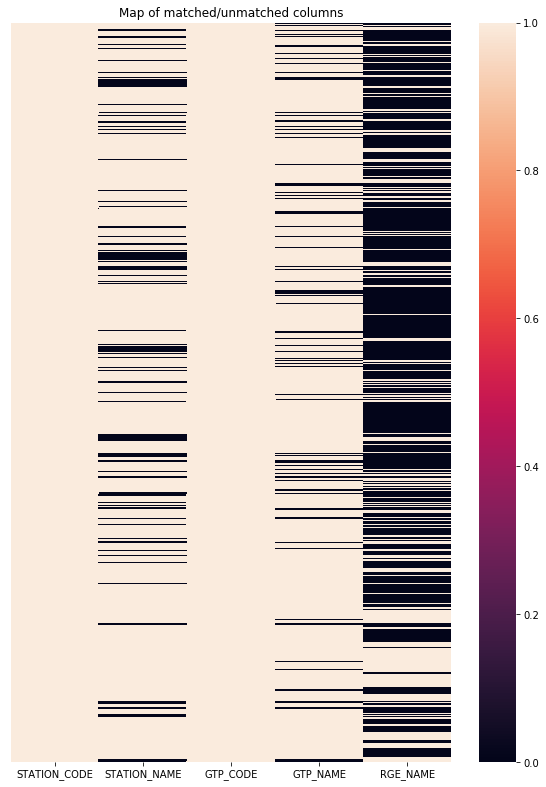

In [21]:
# example of usage of compare_gtprge_rio function:
cols = ['STATION_CODE', 'STATION_NAME', 'GTP_CODE', 'GTP_NAME', 'RGE_NAME']
res = compare_gtprge_rio(dict_gtprge_gen, rio_data, ['RGE_NUM'], ['RGE_CODE'], cols, draw_map=True)

In [25]:
def update_gtprge(df, by_col_mask, matched_mask, author):
    
    """ Updates the initial dictionary according to this algorithm:
        1. If there's difference in STATION_CODE or GTP_CODE fields in a row, 
            then set the DATE_TO variable of such row to the 1st of current month.
            Then create new row with new value of STATION_CODE or GTP_CODE,
            DATE_FROM variable is set to the 1st of current month, DATE_TO - empty.
            All other variable values take from the RIO file.
        2. If there's difference only in STATION_NAME value - take it from RIO file. Ignore the rest.
        3. Else - do nothing. If there's difference in GTP_NAME or RGE_NAME fields - ignore it.
        
        Attributes: 
            compare_mask - result of the comparison of dict and rio data 
                (compare_gtprge_rio(...).get('result_mask_dict'));
            
        Return:
            updated dict_gtprge_gen 
            
    """
    
    
    def generate_comment(x):
        
        """Generate text for 'comment' field, based on unmatching condition.
            Attributes:
                x = dataframe row, containing station code and gtp_code variables from both dict and rio data.
            Returns:
                text of the comment field
        """
        
        if not compare_fields(x[0], x[1]) and not compare_fields(x[2], x[3]):
            return f'{x[0]}, {x[2]}'
        elif not compare_fields(x[0], x[1]) and compare_fields(x[2], x[3]):
            return f'{x[0]}'
        elif compare_fields(x[0], x[1]) and not compare_fields(x[2], x[3]):
            return f'{x[2]}'
        else:
            return ''
        
        
    cols = ['STATION_CODE', 'STATION_NAME', 'GTP_CODE',
           'GTP_NAME', 'RGE_NUM', 'RGE_NAME', 'DAY_AHEAD_TYPE',
           'DATE_FROM', 'DATE_TO', 'AUTHOR', 'STATE', 'DATE_MODIFIED', 'COMMENT']
    
    src_cols = ['STATION_CODE_DICT', 'STATION_NAME_DICT', 'GTP_CODE_DICT',
           'GTP_NAME_DICT', 'RGE_NUM', 'RGE_NAME_DICT', 'DAY_AHEAD_TYPE',
           'DATE_FROM', 'DATE_TO', 'AUTHOR', 'STATE', 'DATE_MODIFIED', 'COMMENT']
    
    # condition 1
    unmatched_codes_rows = df.iloc[np.logical_not(np.array(by_col_mask.get('STATION_CODE'))) | \
                                np.logical_not(np.array(by_col_mask.get('GTP_CODE')))]
    
    # default empty output frame for condition 1
    unmatched_codes_fixed = pd.DataFrame(columns = cols)
    
    # condition 2
    unmatched_names_rows = df.iloc[np.logical_not(by_col_mask.get('STATION_NAME')) & \
                                  np.array(by_col_mask.get('STATION_CODE')) & \
                                           np.array(by_col_mask.get('GTP_CODE'))]
    
    # condition 3
    matched_rows = df.iloc[matched_mask]
    
    # other rows
    other_rows = df.iloc[np.array(by_col_mask.get('STATION_CODE')) & \
                                           np.array(by_col_mask.get('GTP_CODE')) \
                        & by_col_mask.get('STATION_NAME') & np.logical_not(matched_mask)]
    
    num_rows = unmatched_codes_rows.shape[0] + unmatched_names_rows.shape[0] + \
        matched_rows.shape[0] + other_rows.shape[0]

    assert(num_rows == df.shape[0])

    # manage with 1st-condition rows if exist
    if not unmatched_codes_rows.empty:
        old_rows = unmatched_codes_rows[['STATION_CODE_DICT', 'STATION_NAME_DICT', 'GTP_CODE_DICT',
           'GTP_NAME_DICT', 'RGE_NUM', 'RGE_NAME_DICT', 'DAY_AHEAD_TYPE',
           'DATE_FROM', 'DATE_TO', 'AUTHOR', 'STATE', 'DATE_MODIFIED', 'COMMENT']]

        # update value of the date_to field
        old_rows['DATE_TO'] = pd.to_datetime(date.today().replace(day=1).isoformat())

        new_rows = unmatched_codes_rows[['STATION_CODE_RIO', 'STATION_NAME_RIO', 'GTP_CODE_RIO',
           'GTP_NAME_RIO', 'RGE_NUM', 'RGE_NAME_RIO', 'DAY_AHEAD_TYPE',
           'DATE_FROM', 'DATE_TO', 'AUTHOR', 'STATE', 'DATE_MODIFIED', 'COMMENT']]

        # update value of the day_ahead_type field
        new_rows['DAY_AHEAD_TYPE'] = unmatched_codes_rows['IS_SPOT_TRADER'].map(lambda v: 0 if v == 1 else 2)
        new_rows['DATE_FROM'] = pd.to_datetime(date.today().replace(day=1).isoformat())
        new_rows['DATE_TO'] = NaN
        new_rows['AUTHOR'] = author
        new_rows['COMMENT'] = unmatched_codes_rows[['STATION_CODE_DICT', 'STATION_CODE_RIO', 
                                                  'GTP_CODE_DICT', 'GTP_CODE_RIO']] \
                                    .apply(generate_comment, axis=1)
        old_rows.columns = cols
        new_rows.columns = cols
        
        unmatched_codes_fixed = pd.concat([old_rows, new_rows], axis=0)
        unmatched_codes_fixed.columns = cols
        
        print(f'{unmatched_codes_fixed.shape[0] - unmatched_codes_rows.shape[0]} rows were added!')
        
    else:
        
        unmatched_codes_fixed = pd.DataFrame(columns=cols)
        
    # manage with 2st-condition rows if exist: take station_name from rio column
    if not unmatched_names_rows.empty:
        unmatched_names_fixed = unmatched_names_rows[['STATION_CODE_DICT', 'STATION_NAME_RIO', 'GTP_CODE_DICT',
           'GTP_NAME_DICT', 'RGE_NUM', 'RGE_NAME_DICT', 'DAY_AHEAD_TYPE',
           'DATE_FROM', 'DATE_TO', 'AUTHOR', 'STATE', 'DATE_MODIFIED', 'COMMENT']]
        unmatched_names_fixed.columns = cols
            
    # finally, manage with matched rows
    matched_rows = matched_rows[src_cols]
    matched_rows.columns = cols
    
    # manage with other rows
    other_rows = other_rows[src_cols]
    other_rows.columns = cols
    print(f' Number of matched rows = {matched_rows.shape[0]}, \n \
Number of rows with unmatched station_code or gtp_code = {unmatched_codes_fixed.shape[0]}, \n \
Number of rows with unmatched station_name = {unmatched_names_fixed.shape[0]}, \n \
Number of other rows = {other_rows.shape[0]}')
    result_df = pd.concat([matched_rows, unmatched_codes_fixed, unmatched_names_fixed, other_rows], axis=0) \
                                    .sort_values(['RGE_NUM', 'DATE_TO'])
    
    # set column names to lowercase for compatibility with Exergy loader
    cols_lower = [c.lower() for c in cols]
    result_df.columns = cols_lower
        
    return result_df

In [23]:
res = compare_gtprge_rio(dict_gtprge_gen, rio_data, ['RGE_NUM'], ['RGE_CODE'], cols, draw_map=False)

In [65]:
updated_gtprge_dict = update_gtprge(res['dict_rio'], res['result_mask_dict'], res['matched_rows_mask'], 'i.zemskov@skmmp.com')

 Number of matched rows = 387, 
 Number of rows with unmatched station_code or gtp_code = 0, 
 Number of rows with unmatched station_name = 214, 
 Number of other rows = 870


In [92]:
def excel_date(date1):

    """
    Converts datetime.datetime to excel date value
    :param date1: datetime.datetime value to convert
    :return: converted value
    """

    temp = datetime.datetime(1899, 12, 30)    # Note, not 31st Dec but 30th!
    delta = date1 - temp
    return float(delta.days) + (float(delta.seconds) / 86400)
#updated_gtprge_dict['date_from'] = updated_gtprge_dict['date_from'].dt
type(excel_date(pd.to_datetime(date.today().replace(day=1).isoformat())))

float